# DIABETES PREDICTION

# TASK-2

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# loading dataset

In [8]:
df=pd.read_csv("diabetes_data.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype !='O']
print("Numerical feature count {}".format(len(numerical_feature)))

Numerical feature count 9


In [10]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature count {}".format(len(discrete_feature)))

Discrete feature count 2


In [11]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature count {}".format(len(continuous_feature)))

Continuous feature count 7


In [12]:
categorical_feature=[feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature count {}".format(len(categorical_feature)))

Categorical feature count 0


In [13]:
df.drop_duplicates(inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
df.dropna(how='all',axis='columns',inplace=True)

# Check Missing Values

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Handling Missing values

In [16]:
df.isnull().sum()*100/len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Shape of Dataset

In [17]:
df.shape

(768, 9)

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


# Heat Map

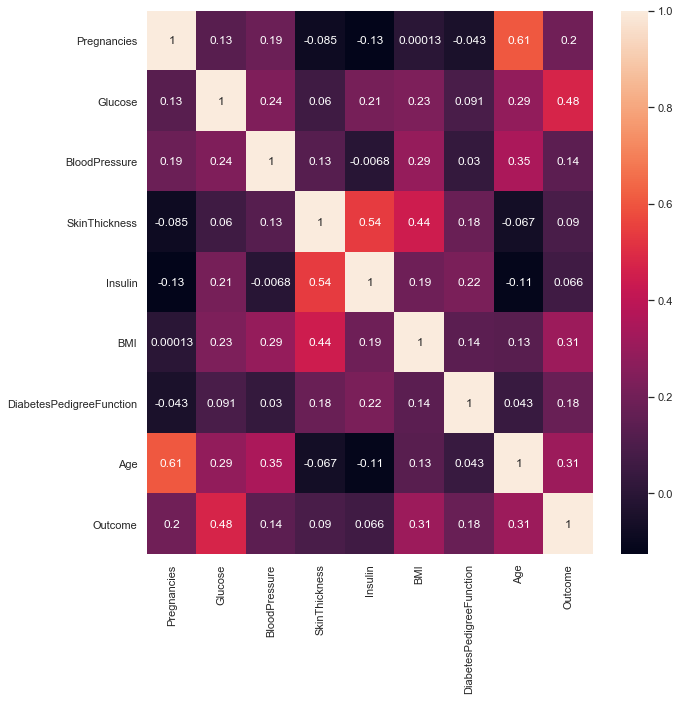

In [20]:
hm=df.corr(method='spearman')
plt.figure(figsize=(10,10))
g=sns.heatmap(hm,annot=True)

# Distplot

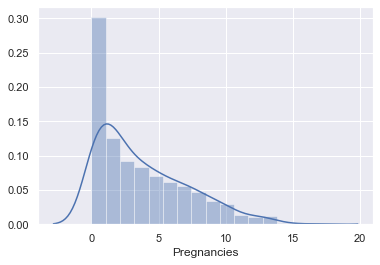

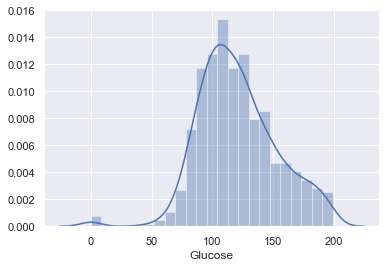

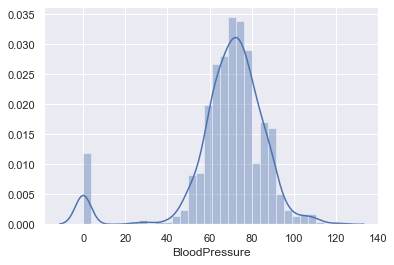

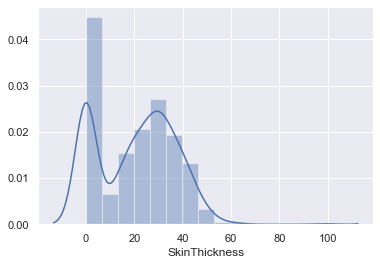

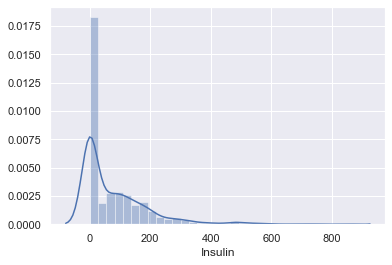

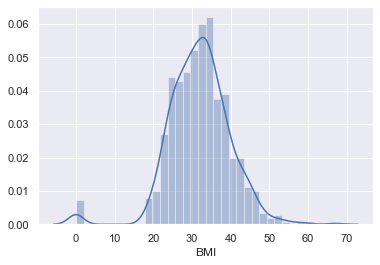

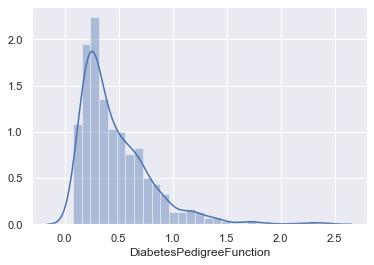

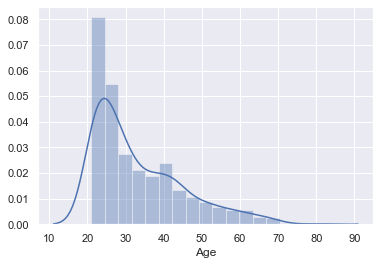

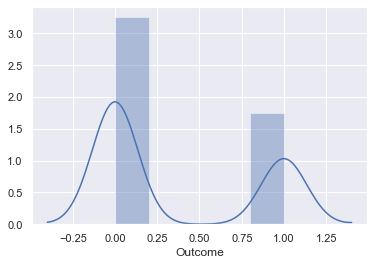

In [21]:
df_feature=df.columns
for feature in df_feature:
    p=sns.distplot(a=df[feature])
    plt.show()

# Histogram Plot

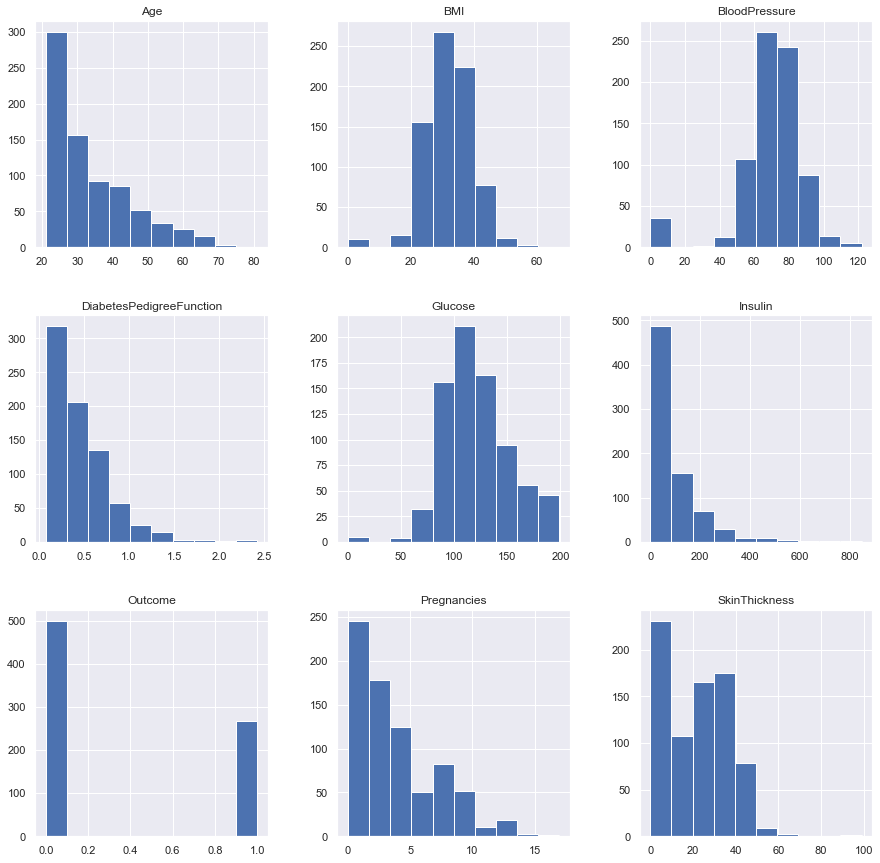

In [22]:
h=df.hist(figsize=(15,15))

# scatter Plot

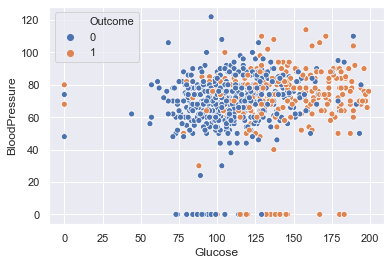

In [23]:
sc=sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=df)

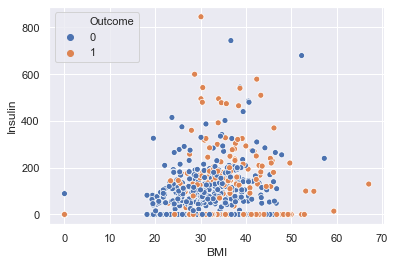

In [24]:
sc1=sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=df)

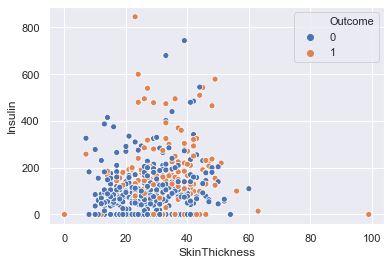

In [25]:
sc2=sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df)

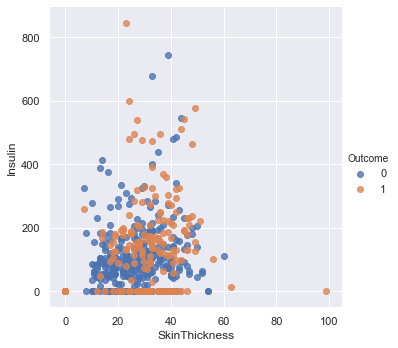

In [26]:
sns.lmplot(x='SkinThickness',y='Insulin',hue='Outcome',data=df,fit_reg=False)

# Boxplot

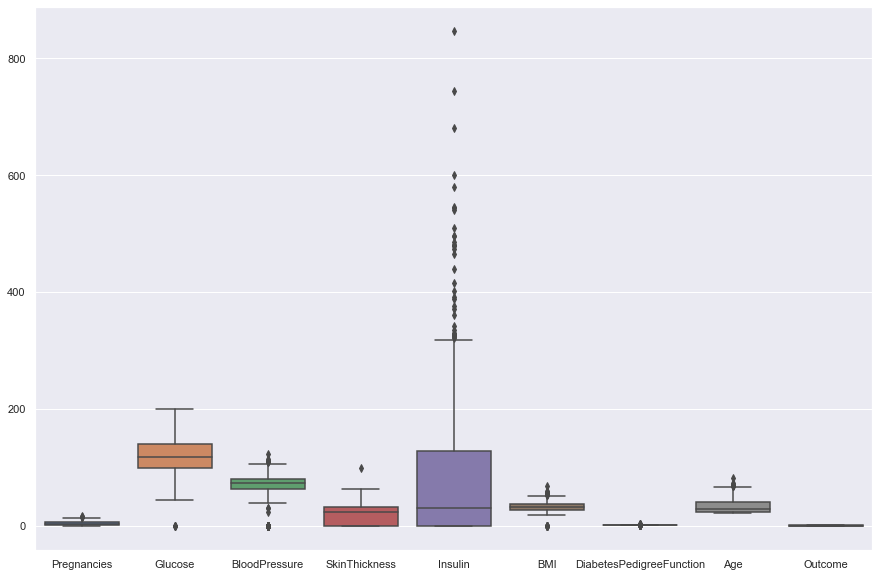

In [27]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

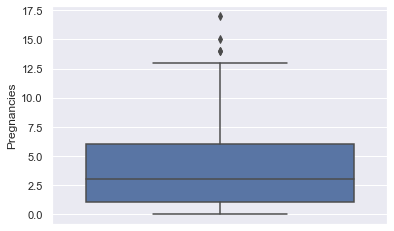

In [28]:
sns.boxplot(y='Pregnancies',data=df)

# Piechart

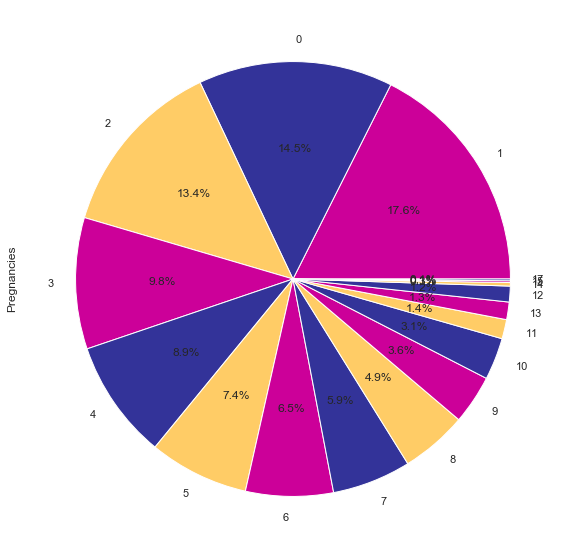

In [29]:
colors=["#CC0099","#333399","#FFCC66"]
pc=df['Pregnancies'].value_counts(ascending=False).plot.pie(colors=colors,autopct='%1.1f%%',figsize=(15,10))
plt.show()

# Join Plot

<Figure size 1080x720 with 0 Axes>

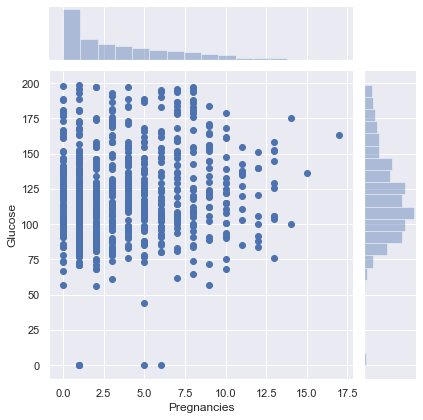

In [30]:
plt.figure(figsize=(15,10))
sns.jointplot(x='Pregnancies',y='Glucose',data=df)

# Pair plot

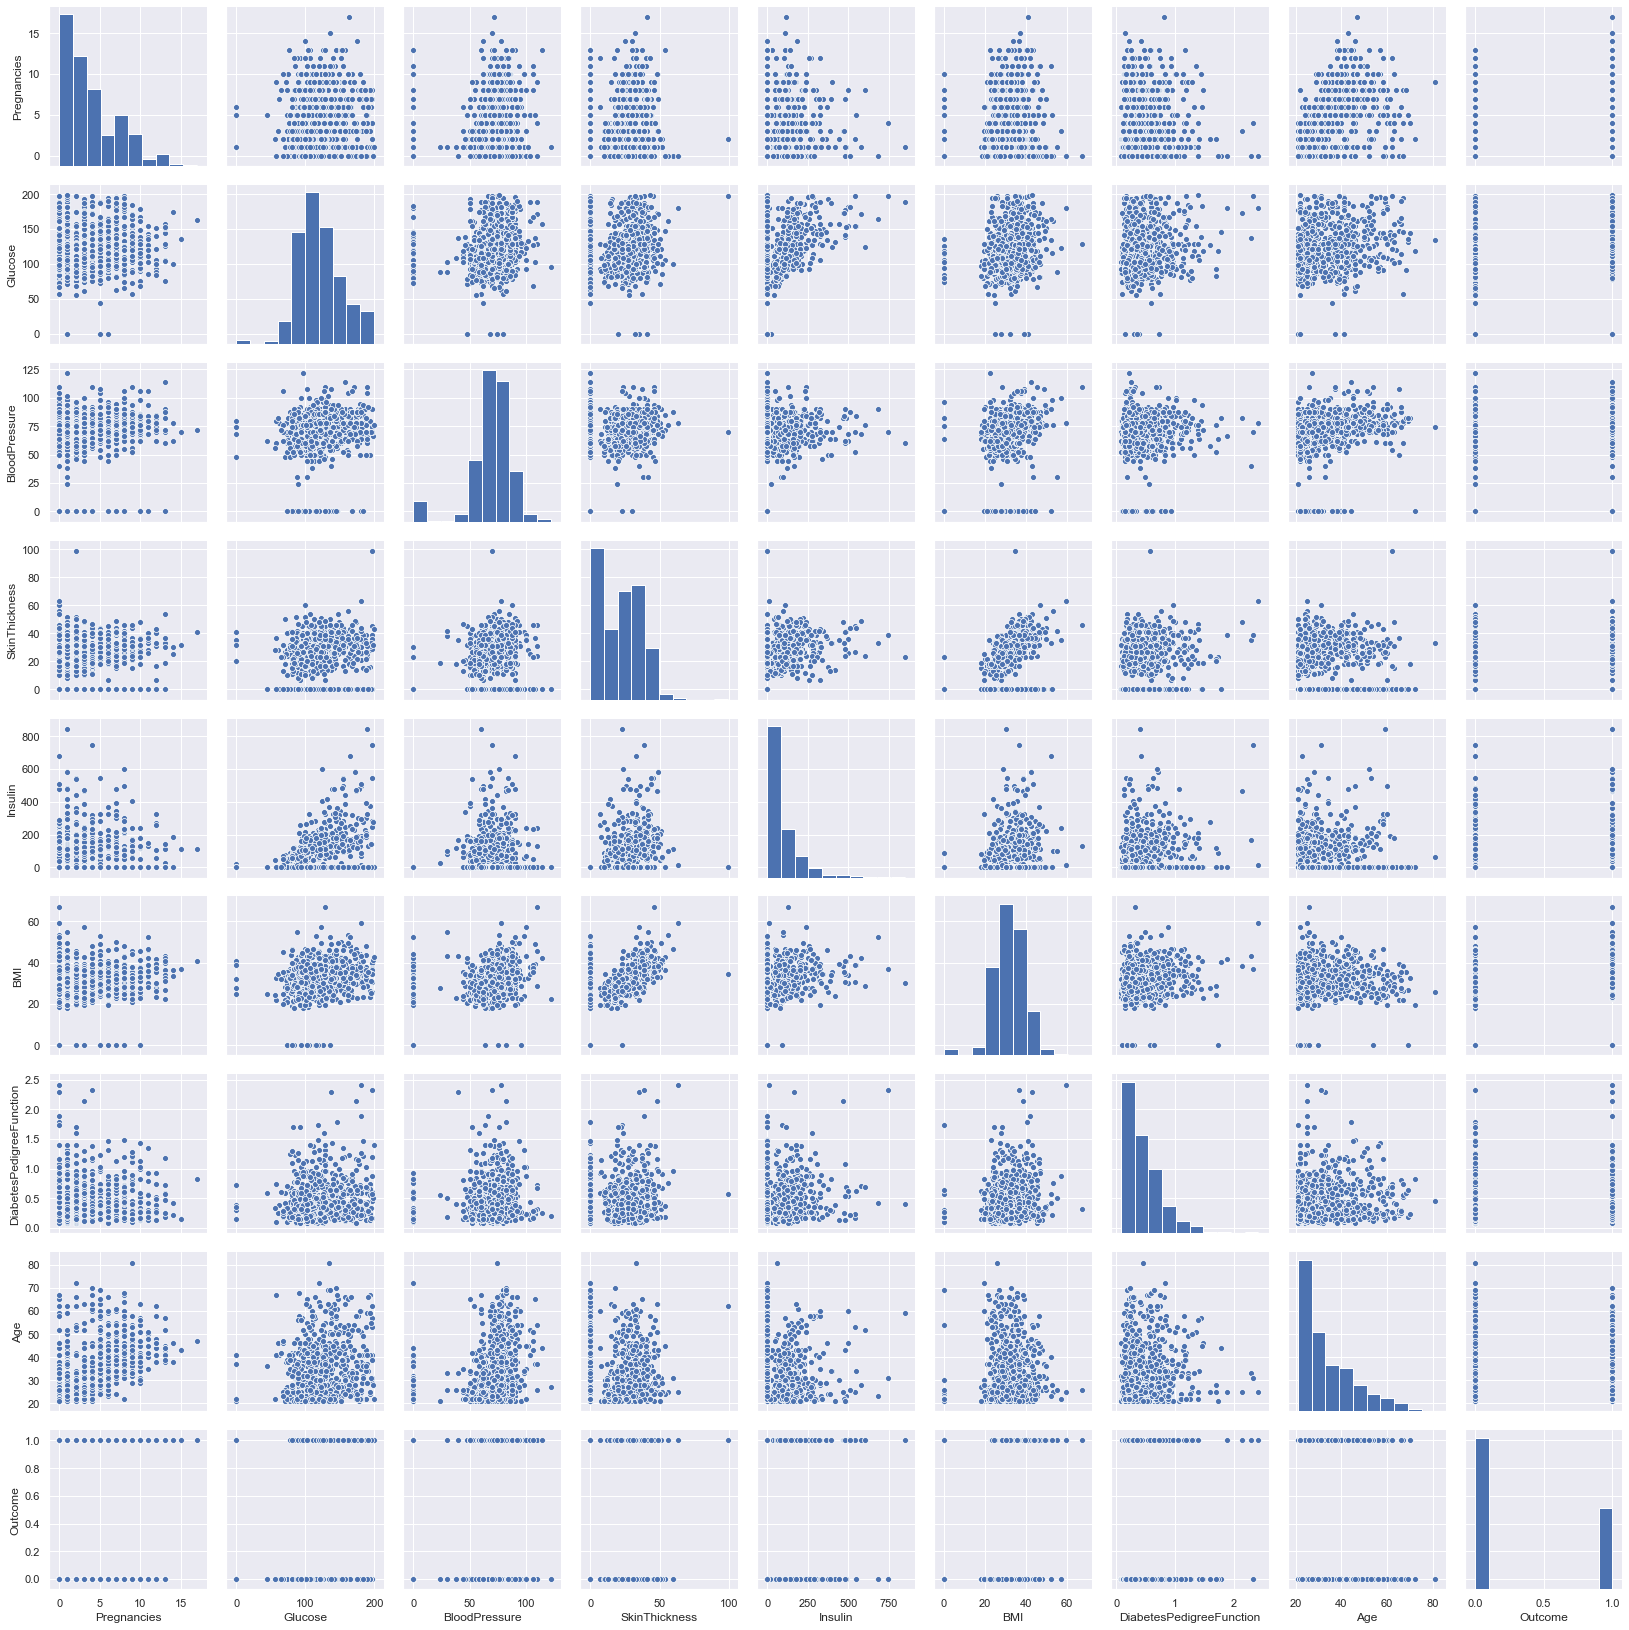

In [31]:
sns.pairplot(df)

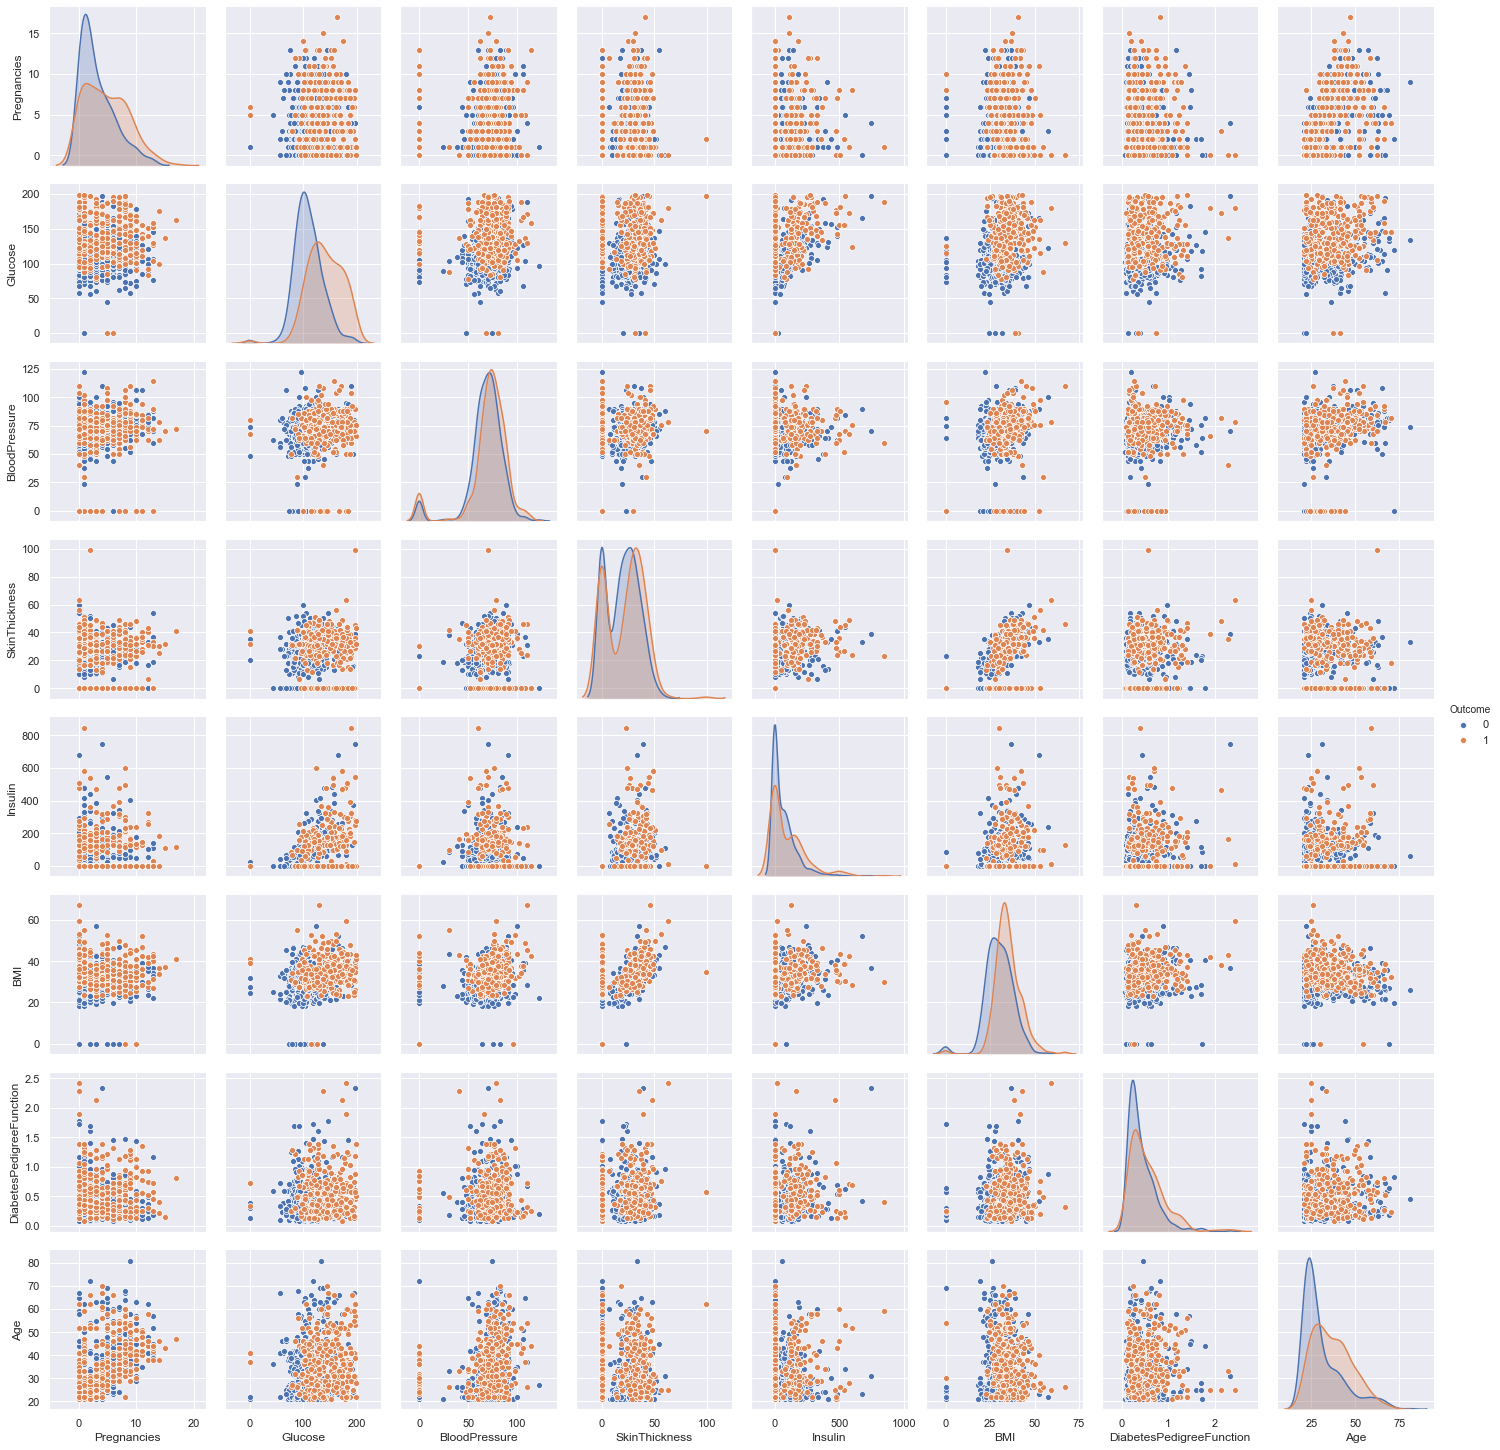

In [32]:
sns.pairplot(data=df,hue='Outcome')
plt.show()

# Probability plot

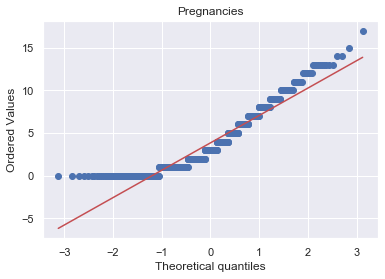

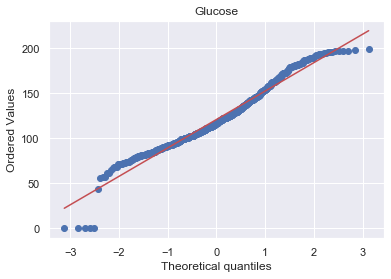

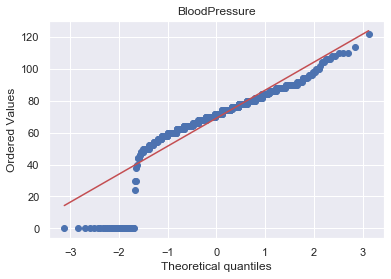

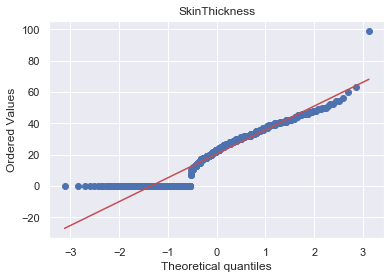

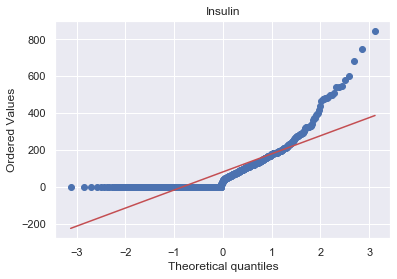

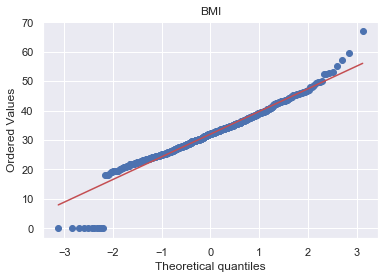

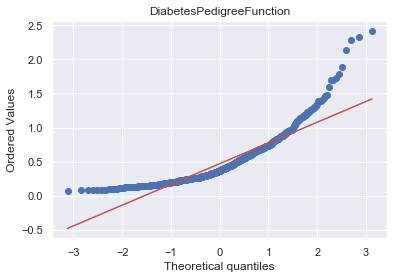

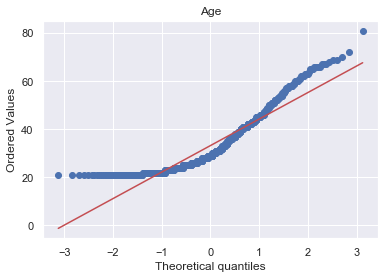

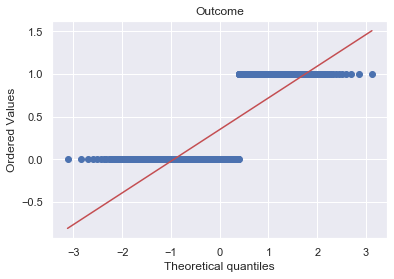

In [33]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature],plot=plt)
    plt.title(feature)
    plt.show()

# Density plot

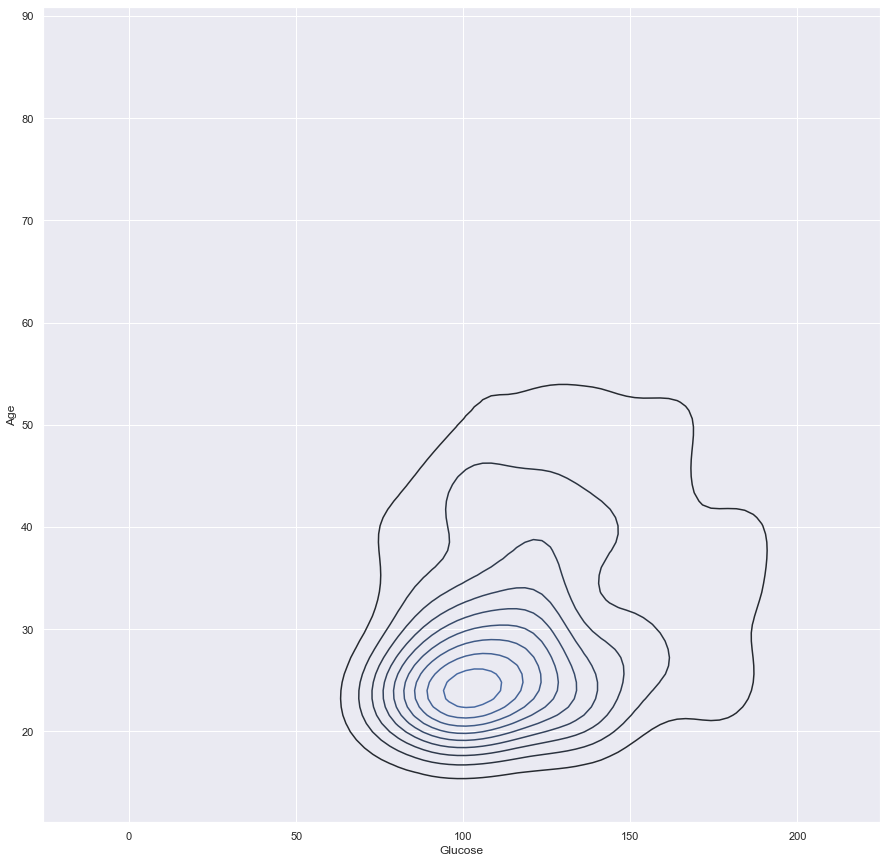

In [34]:
plt.figure(figsize=(15,15))
sns.kdeplot(df.Glucose,df.Age)

# Training the dataset

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [36]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [37]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting the dataset into Training and testing phase

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)

# Fitting the dataset

 # KNN (K-Nearest Neighbours)

In [40]:
def knn_classifier(x_train,x_test,y_train,y_test):
    classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
    classifier_knn.fit(x_train,y_train)
    y_predict=classifier_knn.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    return print(f"Train Score : {classifier_knn.score(x_train,y_train)}\nTest Score : {classifier_knn.score(x_test,y_test)}")

# Random Forest Algorithm

In [41]:
def forest_classifier(x_train,x_test,y_train,y_test):
    classifier_forest=RandomForestClassifier(criterion='entropy',random_state=0)
    classifier_forest.fit(x_train,y_train)
    y_predict=classifier_forest.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    return print(f"Train Score : {classifier_forest.score(x_train,y_train)}\nTest Score : {classifier_forest.score(x_test,y_test)}")

# Naives Baye's Algorithm

In [42]:
def naive_classifier(x_train,x_test,y_train,y_test):
    classifier_naive=GaussianNB()
    classifier_naive.fit(x_train,y_train)
    y_predict=classifier_naive.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    return print(f"Train Score : {classifier_naive.score(x_train,y_train)}\nTest Score : {classifier_naive.score(x_test,y_test)}")

# Decision tree Algorithm

In [43]:
def tree_classifier(x_train,x_test,y_train,y_test):
    classifier_tree=DecisionTreeClassifier(criterion='entropy',random_state=0,splitter='best')
    classifier_tree.fit(x_train,y_train)
    y_predict=classifier_tree.predict(x_test)
    cm=confusion_matrix(y_test,y_predict)
    return print(f"Train Score : {classifier_tree.score(x_train,y_train)}\nTest Score : {classifier_tree.score(x_test,y_test)}")

In [46]:
def print_s(x_train,x_test,y_train,y_test):
    print("KNN : \n")
    knn_classifier(x_train,x_test,y_train,y_test)
    print("_"*50)
    print()
    print("Random Forest : \n")
    forest_classifier(x_train,x_test,y_train,y_test)
    print("_"*50)
    print()
    print("Naive baye's : \n")
    naive_classifier(x_train,x_test,y_train,y_test)
    print("_"*50)
    print()
    print("Decision Tree : \n")
    tree_classifier(x_train,x_test,y_train,y_test)

In [47]:
print_s(x_train,x_test,y_train,y_test)

KNN : 

Train Score : 0.8098958333333334
Test Score : 0.7421875
__________________________________________________

Random Forest : 

Train Score : 1.0
Test Score : 0.765625
__________________________________________________

Naive baye's : 

Train Score : 0.78125
Test Score : 0.7447916666666666
__________________________________________________

Decision Tree : 

Train Score : 1.0
Test Score : 0.7109375


In [48]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=20.0)
knn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)

In [49]:
log.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

C:\Users\India\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_log=log.predict(x_test)
y_knn=knn.predict(x_test)
y_dt=dt.predict(x_test)
y_rf=rf.predict(x_test)

In [53]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

# comparing the graph on the basis of HEAT MAP

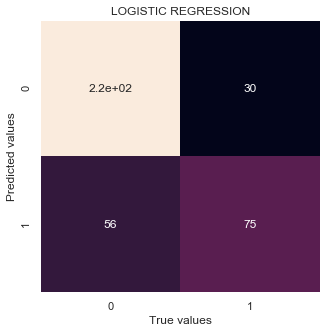

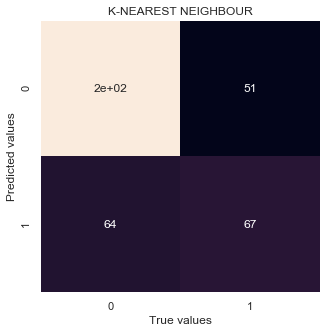

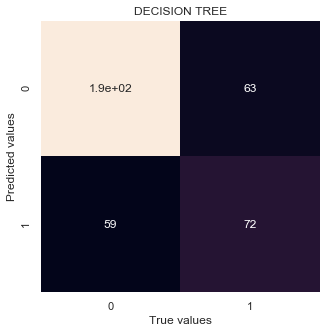

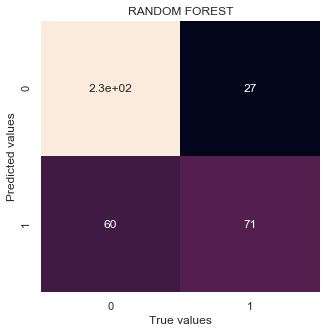

In [54]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(log_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('LOGISTIC REGRESSION')
plt.show()

plt.figure(figsize=(5,5))
sns.heatmap(knn_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('K-NEAREST NEIGHBOUR')
plt.show()

plt.figure(figsize=(5,5))
sns.heatmap(dt_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('DECISION TREE')
plt.show()

plt.figure(figsize=(5,5))
sns.heatmap(rf_cm_test,annot=True,cbar=False)
plt.xlabel('True values'),plt.ylabel('Predicted values')
plt.title('RANDOM FOREST')
plt.show()

# comparing the accuracy score on the basis of BARPLOT

In [55]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [56]:
print("ACCURACY SCORES : \n")
print("<<<<<<<<< LOGISTIC REGRESSION >>>>>>>>>>>>>>\n")
print(log_acc_test,'\n')

print("<<<<<<<<< K-NEAREST NEIGHBOUR >>>>>>>>>>>>>>\n")
print(knn_acc_test,'\n')

print("<<<<<<<<< DECISION TREE >>>>>>>>>>>>>>\n")
print(dt_acc_test,'\n')

print("<<<<<<<<< RANDOM FOREST >>>>>>>>>>>>>>\n")
print(rf_acc_test,'\n')

ACCURACY SCORES : 

<<<<<<<<< LOGISTIC REGRESSION >>>>>>>>>>>>>>

0.7760416666666666 

<<<<<<<<< K-NEAREST NEIGHBOUR >>>>>>>>>>>>>>

0.7005208333333334 

<<<<<<<<< DECISION TREE >>>>>>>>>>>>>>

0.6822916666666666 

<<<<<<<<< RANDOM FOREST >>>>>>>>>>>>>>

0.7734375 



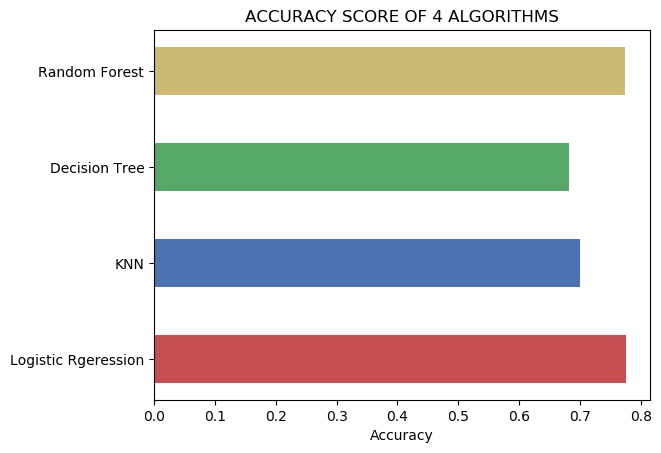

In [61]:
acc_list=[log_acc_test,knn_acc_test,dt_acc_test,rf_acc_test]
import matplotlib.pyplot as plt; plt.rcdefaults()
objects=("Logistic Rgeression","KNN","Decision Tree","Random Forest")
y_pos=np.arange(len(objects))
performance=acc_list
width=1/2
plt.barh(y_pos,performance,width,align='center',alpha=1,color='rbgy')
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.title('ACCURACY SCORE OF 4 ALGORITHMS')
plt.show()

# performance

In [63]:
classifier_forest=RandomForestClassifier(criterion='entropy')
classifier_forest.fit(x_train,y_train)
y_predict=classifier_forest.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm

array([[230,  23],
       [ 63,  68]], dtype=int64)

In [65]:
pd.crosstab(y_test,y_predict,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,1,All
True,,,
0,230,23,253
1,63,68,131
All,293,91,384


# checking the data is balanced or not

In [66]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Finding the precision,recall,F-1 score,support

In [67]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       253
           1       0.75      0.52      0.61       131

    accuracy                           0.78       384
   macro avg       0.77      0.71      0.73       384
weighted avg       0.77      0.78      0.76       384



# ThankYou